<a href="https://colab.research.google.com/github/Rizwar11/PemproLanjutanRizwar/blob/main/Copy_of_TugasBesar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install matplotlib

In [ ]:
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt

from google.colab import data_table
data_table.disable_dataframe_formatter()

In [ ]:
data = pd.read_excel('/content/DataScore.xlsx')
data.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelors degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associates degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# New Section

# New Section

In [ ]:
data.rename(columns={ #Mengubah nama data di dalam kolom
    'Unnamed: 0':'Index',
    'gender':'Jenis Kelamin',
    'race/ethnicity':'kelompok ras',
    'parental level of education':'Pendidikan Orangtua',
    'lunch':'Jenis Makanan',
    'test preparation course':'Kursus belajar',
    'math score':'Skor Matematika',
    'reading score':'Skor Membaca',
    'writing score':'Skor Menulis'
}, inplace=True)
data.head()

,Jenis Kelamin,kelompok ras,Pendidikan Orangtua,Jenis Makanan,Kursus belajar,Skor Matematika,Skor Membaca,Skor Menulis
0,female,group B,bachelors degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associates degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# New Section

## **Analisis**

In [ ]:
data['Jenis Kelamin'].replace({
    #Mengubah nama data di dalam baris
    'female':'PR',
    'male':'LK'
}, inplace=True)

In [ ]:
data['Pendidikan Orangtua'].replace({
    #Mengubah nama data di dalam baris
    'bachelors degree':'Sarjana',
    'some college':'kolase',
    'masters degree':'Magister',
    'associates degree':'Diploma III'
}, inplace=True)

<ipython-input-16-bcc7474660ea>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Pendidikan Orangtua'].replace({


In [ ]:
data['Kursus belajar'].replace({
    #Mengubah nama data di dalam baris
    'none':'Tidak',
    'completed':'Selesai'

}, inplace=True)

<ipython-input-17-b4ec845d1341>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Kursus belajar'].replace({


In [ ]:
data['Jenis Makanan'].replace({ #Mengubah nama data di dalam baris, dengan tujuan agar lebih mudah di analisis
    'free/reduced':'Bebas/Mengurangi',


}, inplace=True)

<ipython-input-18-b29b10fed087>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Jenis Makanan'].replace({ #Mengubah nama data di dalam baris, dengan tujuan agar lebih mudah di analisis


In [ ]:
data.head()

,Jenis Kelamin,kelompok ras,Pendidikan Orangtua,Jenis Makanan,Kursus belajar,Skor Matematika,Skor Membaca,Skor Menulis
0,PR,group B,Sarjana,standard,Tidak,72,72,74
1,PR,group C,kolase,standard,Selesai,69,90,88
2,PR,group B,master's degree,standard,Tidak,90,95,93
3,LK,group A,Diploma III,Bebas/Mengurangi,Tidak,47,57,44
4,LK,group C,kolase,standard,Tidak,76,78,75


In [ ]:
#Membuat data frame dari tabel
data = {
    "Jenis Kelamin": ["PR", "PR", "PR", "LK", "LK"], #data yang ditampilkan terbatas
    "kelompok ras": ["group B", "group C", "group B", "group A", "group C"],
    "Pendidikan Orangtua": ["Sarjana", "kolase", "Magister", "Diploma III", "kolase"],
    "Jenis Makanan": ["standard", "standard", "standard", "Bebas/Mengurangi", "standard"],
    "Kursus belajar": ["Tidak", "Selesai", "Tidak", "Tidak", "Tidak"],
    "Skor Matematika": [72, 69, 90, 47, 76],
    "Skor Membaca": [72, 90, 95, 57, 78],
    "Skor Menulis": [74, 88, 93, 44, 75],
}

df = pd.DataFrame(data)

# Mengelompokkan data berdasarkan jenis kelamin
grouped_data = df.groupby("Jenis Kelamin")

# Menampilkan tabel untuk PR dan LK
pr_data = grouped_data.get_group("PR")
lk_data = grouped_data.get_group("LK")

# Tampilkan tabel rapi menggunakan tabulate (opsional)
from tabulate import tabulate

print("Data Perempuan (PR):")
print(tabulate(pr_data, headers="keys", tablefmt="grid"))

print("\nData Laki-Laki (LK):")
print(tabulate(lk_data, headers="keys", tablefmt="grid"))

# Simpan tabel ke file Excel untuk tampilan rapi
pr_data.to_excel("Data_Perempuan.xlsx", index=False)
lk_data.to_excel("Data_Laki_Laki.xlsx", index=False)

print("\nData telah disimpan ke file Excel.")


Data Perempuan (PR):
+----+-----------------+----------------+-----------------------+-----------------+------------------+-------------------+----------------+----------------+
|    | Jenis Kelamin   | kelompok ras   | Pendidikan Orangtua   | Jenis Makanan   | Kursus belajar   |   Skor Matematika |   Skor Membaca |   Skor Menulis |
+====+=================+================+=======================+=================+==================+===================+================+================+
|  0 | PR              | group B        | Sarjana               | standard        | Tidak            |                72 |             72 |             74 |
+----+-----------------+----------------+-----------------------+-----------------+------------------+-------------------+----------------+----------------+
|  1 | PR              | group C        | kolase                | standard        | Selesai          |                69 |             90 |             88 |
+----+-----------------+-------------

In [ ]:
pr_data.groupby('Jenis Makanan')['Skor Membaca'].mean()

,Skor Membaca
Jenis Makanan,
standard,85.666667


In [ ]:
lk_data.groupby('Pendidikan Orangtua')['Skor Matematika'].mean()
# Menghitung rata-rata dari Pendidikan Orangtua

,Skor Matematika
Pendidikan Orangtua,
Diploma III,47.0
kolase,76.0


<ipython-input-23-f43c7ed377b0>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


[Text(0.5, 1.0, 'Jenis makanan yang mempengaruhi nilai')]

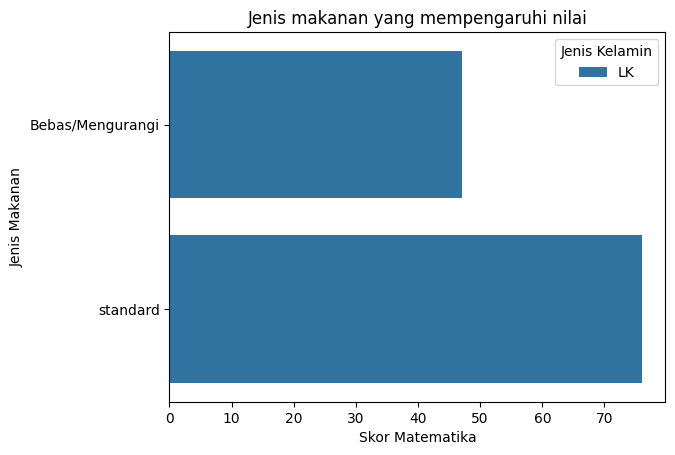

In [ ]:
sns.barplot(
    data=lk_data,  #Lk data
    x='Skor Matematika',  # kelompok r
    y='Jenis Makanan',
    hue='Jenis Kelamin',
    ci=None
).set(title='Jenis makanan yang mempengaruhi nilai')

<ipython-input-24-efc95459295f>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(
<ipython-input-24-efc95459295f>:1: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:yellow'` for the same effect.

  sns.barplot(


[Text(0.5, 1.0, '')]

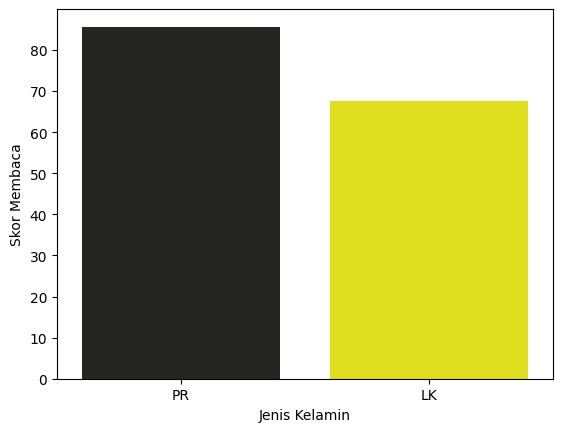

In [ ]:
sns.barplot(
    data=df,
    x='Jenis Kelamin',
    y='Skor Membaca',
    hue='Jenis Kelamin',
    color='yellow',  # warna bar
    ci=None
).set(title='')

<ipython-input-25-6290681af8c6>:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(


[Text(0.5, 1.0, 'Pendidikan orang tua terbanyak kursus belajar')]

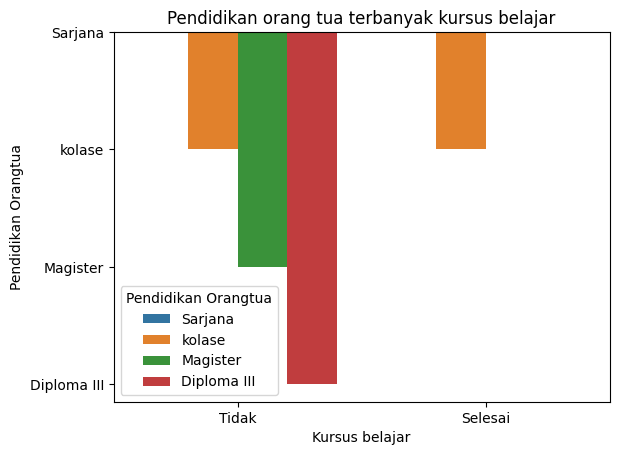

In [ ]:
sns.barplot(
    data=data,  #Lk data
    x='Kursus belajar',  # kelompok r
    y='Pendidikan Orangtua',
    hue='Pendidikan Orangtua',
    ci=None
).set(title='Pendidikan orang tua terbanyak kursus belajar')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5 entries, 0 to 4
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Jenis Kelamin        5 non-null      object
 1   kelompok ras         5 non-null      object
 2   Pendidikan Orangtua  5 non-null      object
 3   Jenis Makanan        5 non-null      object
 4   Kursus belajar       5 non-null      object
 5   Skor Matematika      5 non-null      int64 
 6   Skor Membaca         5 non-null      int64 
 7   Skor Menulis         5 non-null      int64 
dtypes: int64(3), object(5)
memory usage: 452.0+ bytes


In [ ]:
df.isnull().sum()

,0
Jenis Kelamin,0
kelompok ras,0
Pendidikan Orangtua,0
Jenis Makanan,0
Kursus belajar,0
Skor Matematika,0
Skor Membaca,0
Skor Menulis,0


In [ ]:
correlation = df['Skor Matematika'].corr(df['Skor Membaca'])
print(correlation)

0.8505075964359439


In [ ]:
correlation = df['Skor Matematika'].corr(df['Skor Menulis'])
print(correlation)

0.8927789986777649


In [ ]:
correlation = df['Skor Menulis'].corr(df['Skor Membaca'])
print(correlation)

0.9733161797494011


In [ ]:
# prompt: Berikan nilai rata - rata dan standar deviasinya

import pandas as pd

# Dengan asumsi 'df' adalah DataFrame Anda (seperti yang didefinisikan dalam kode yang Anda berikan)
# Hitung rata-rata dan standar deviasi untuk 'Skor Matematika'
mean_math = df['Skor Matematika'].mean()
std_math = df['Skor Matematika'].std()

print(f"Rata-rata Skor Matematika: {mean_math}")
print(f"Standar Deviasi Skor Matematika: {std_math}")

# Hitung rata-rata dan standar deviasi untuk 'Skor Membaca'
mean_reading = df['Skor Membaca'].mean()
std_reading = df['Skor Membaca'].std()

print(f"Rata-rata Skor Membaca: {mean_reading}")
print(f"Standar Deviasi Skor Membaca: {std_reading}")

# Hitung rata-rata dan standar deviasi untukr 'Skor Menulis'
mean_writing = df['Skor Menulis'].mean()
std_writing = df['Skor Menulis'].std()

print(f"Rata-rata Skor Menulis: {mean_writing}")
print(f"Standar Deviasi Skor Menulis: {std_writing}")

Rata-rata Skor Matematika: 70.8
Standar Deviasi Skor Matematika: 15.546703830716016
Rata-rata Skor Membaca: 78.4
Standar Deviasi Skor Membaca: 15.076471735787521
Rata-rata Skor Menulis: 74.8
Standar Deviasi Skor Menulis: 19.070920271449932


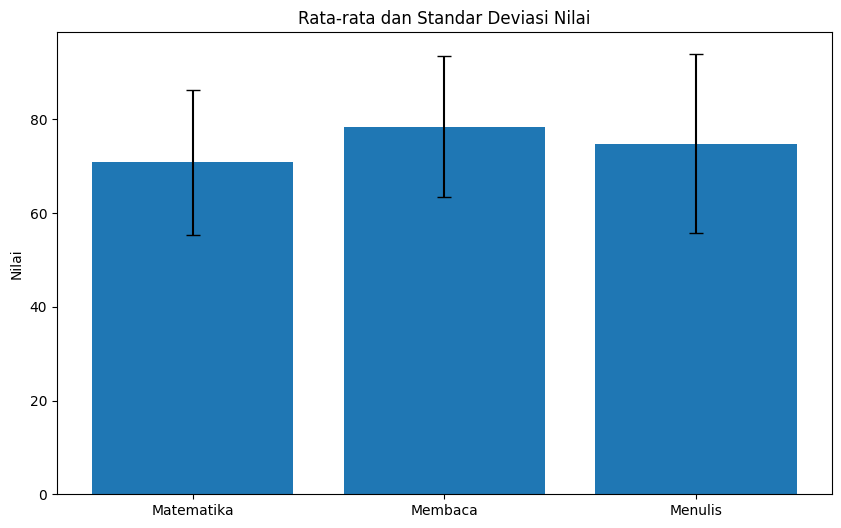

In [ ]:
# Dengan asumsi 'df' adalah DataFrame Anda
# Hitung rata-rata dan standar deviasi untuk 'Skor Matematika', 'Skor Membaca', dan 'Skor Menulis'
mean_math = df['Skor Matematika'].mean()
std_math = df['Skor Matematika'].std()
mean_reading = df['Skor Membaca'].mean()
std_reading = df['Skor Membaca'].std()
mean_writing = df['Skor Menulis'].mean()
std_writing = df['Skor Menulis'].std()

# Membuat visualisasi
plt.figure(figsize=(10, 6))

# Plot rata-rata dan standar deviasi
plt.bar(['Matematika', 'Membaca', 'Menulis'], [mean_math, mean_reading, mean_writing], yerr=[std_math, std_reading, std_writing], capsize=5)
plt.ylabel('Nilai')
plt.title('Rata-rata dan Standar Deviasi Nilai')
plt.show()

In [ ]:
# Perhitungan pada persentil ketiga sampel
percentiles = df[['Skor Matematika', 'Skor Membaca', 'Skor Menulis']].quantile([0.25, 0.5, 0.75])

print("\nPercentiles:")
print(tabulate(percentiles, headers="keys", tablefmt="grid"))


Percentiles:
+------+-------------------+----------------+----------------+
|      |   Skor Matematika |   Skor Membaca |   Skor Menulis |
+======+===================+================+================+
| 0.25 |                69 |             72 |             74 |
+------+-------------------+----------------+----------------+
| 0.5  |                72 |             78 |             75 |
+------+-------------------+----------------+----------------+
| 0.75 |                76 |             90 |             88 |
+------+-------------------+----------------+----------------+



Percentiles:
+------+-------------------+----------------+----------------+
|      |   Skor Matematika |   Skor Membaca |   Skor Menulis |
+======+===================+================+================+
| 0.25 |                69 |             72 |             74 |
+------+-------------------+----------------+----------------+
| 0.5  |                72 |             78 |             75 |
+------+-------------------+----------------+----------------+
| 0.75 |                76 |             90 |             88 |
+------+-------------------+----------------+----------------+


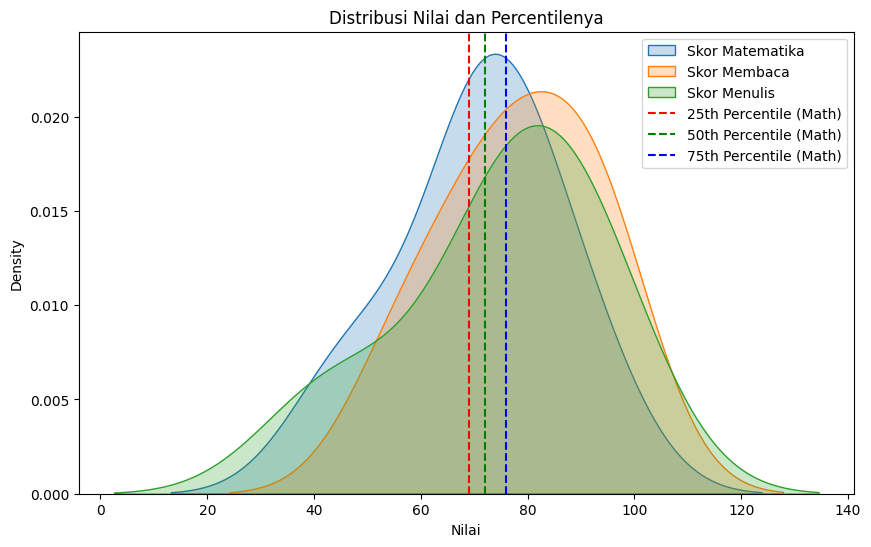

In [ ]:
# Kallkulasikan persentil untuk 'Skor Matematika', 'Skor Membaca', and 'Skor Menulis'
percentiles = df[['Skor Matematika', 'Skor Membaca', 'Skor Menulis']].quantile([0.25, 0.5, 0.75])

print("\nPercentiles:")
print(tabulate(percentiles, headers="keys", tablefmt="grid"))

# Visualisasikan persentil
plt.figure(figsize=(10, 6))
for col in ['Skor Matematika', 'Skor Membaca', 'Skor Menulis']:
    sns.kdeplot(df[col], label=col, fill=True)

plt.axvline(percentiles.loc[0.25, 'Skor Matematika'], color='red', linestyle='--', label='25th Percentile (Math)')
plt.axvline(percentiles.loc[0.5, 'Skor Matematika'], color='green', linestyle='--', label='50th Percentile (Math)')
plt.axvline(percentiles.loc[0.75, 'Skor Matematika'], color='blue', linestyle='--', label='75th Percentile (Math)')


plt.xlabel('Nilai')
plt.ylabel('Density')
plt.title('Distribusi Nilai dan Percentilenya')
plt.legend()
plt.show()

In [ ]:
# Nilai minimum dan maksimum untuk setiap kolom skor
min_max_scores = df[['Skor Matematika', 'Skor Membaca', 'Skor Menulis']].agg(['min', 'max'])

print("\nNilai Minimum dan Maksimum:")
print(tabulate(min_max_scores, headers="keys", tablefmt="grid"))


Nilai Minimum dan Maksimum:
+-----+-------------------+----------------+----------------+
|     |   Skor Matematika |   Skor Membaca |   Skor Menulis |
+=====+===================+================+================+
| min |                47 |             57 |             44 |
+-----+-------------------+----------------+----------------+
| max |                90 |             95 |             93 |
+-----+-------------------+----------------+----------------+



Nilai Minimum dan Maksimum:
+-----+-------------------+----------------+----------------+
|     |   Skor Matematika |   Skor Membaca |   Skor Menulis |
+=====+===================+================+================+
| min |                47 |             57 |             44 |
+-----+-------------------+----------------+----------------+
| max |                90 |             95 |             93 |
+-----+-------------------+----------------+----------------+


<Figure size 1000x600 with 0 Axes>

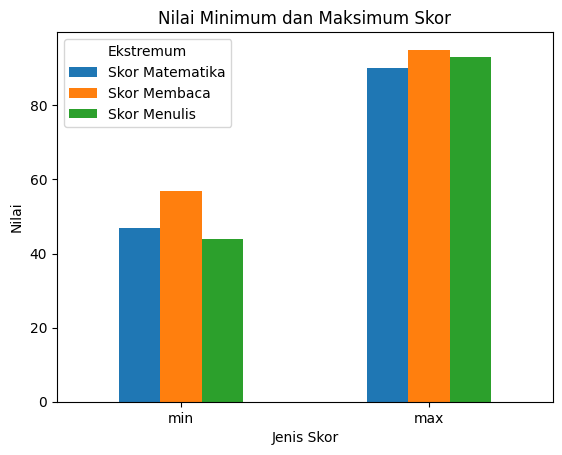

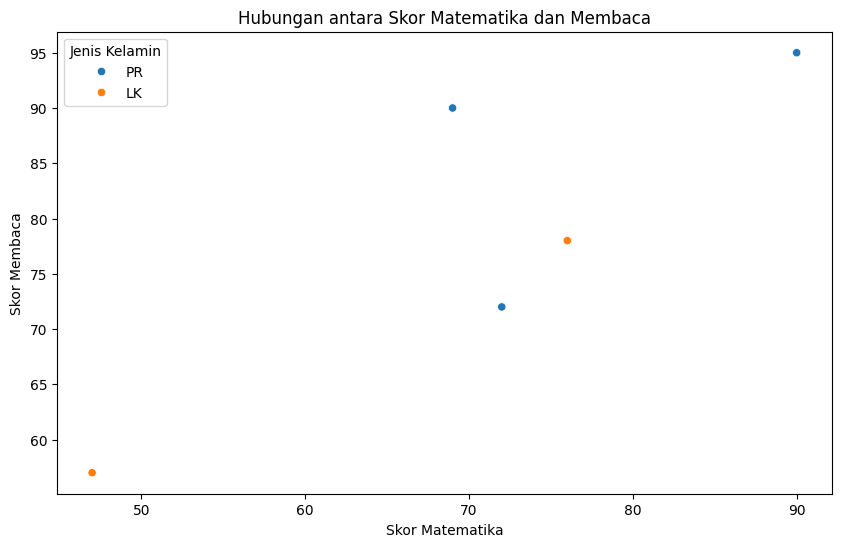

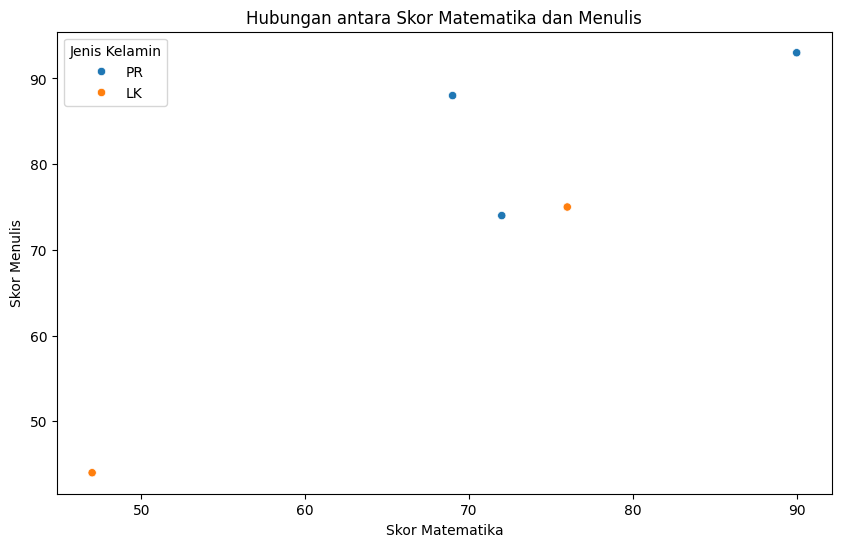

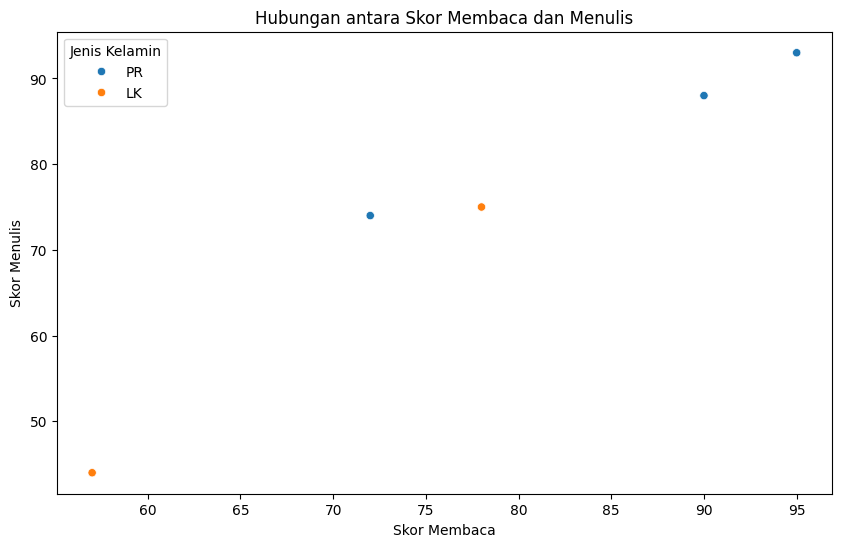

In [ ]:
# Nilai minimum dan maksimum untuk setiap kolom skor
min_max_scores = df[['Skor Matematika', 'Skor Membaca', 'Skor Menulis']].agg(['min', 'max'])

print("\nNilai Minimum dan Maksimum:")
print(tabulate(min_max_scores, headers="keys", tablefmt="grid"))

# Visualisasi Bar Plot untuk nilai minimum dan maksimum
plt.figure(figsize=(10, 6))
min_max_scores.plot(kind='bar', rot=0)
plt.title('Nilai Minimum dan Maksimum Skor')
plt.ylabel('Nilai')
plt.xlabel('Jenis Skor')
plt.legend(title='Ekstremum')
plt.show()


# Visualisasi Scatter Plot untuk hubungan antara skor
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Skor Matematika', y='Skor Membaca', hue='Jenis Kelamin')
plt.title('Hubungan antara Skor Matematika dan Membaca')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Skor Matematika', y='Skor Menulis', hue='Jenis Kelamin')
plt.title('Hubungan antara Skor Matematika dan Menulis')
plt.show()

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Skor Membaca', y='Skor Menulis', hue='Jenis Kelamin')
plt.title('Hubungan antara Skor Membaca dan Menulis')
plt.show()